<a href="https://colab.research.google.com/github/victory2588/Machine-Learning/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8_%EA%B0%80%EA%B2%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 길이:  365 
앞쪽 5개 값:  [[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]]


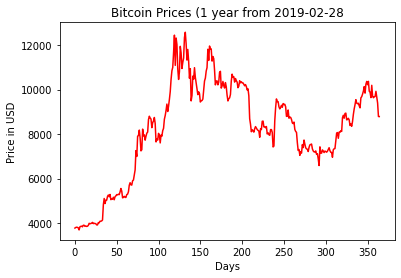

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#코인데스트 사이트에서 다운로드한 1년치 비트코인 가격 데이터 읽기
f=open('BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy() #종가만 취함
print('데이터 길이: ',len(seq),'\n앞쪽 5개 값: ',seq[0:5])

#그래프로 데이터 확인
plt.plot(seq,color='red')
plt.title('Bitcoin Prices (1 year from 2019-02-28')
plt.xlabel('Days');plt.ylabel('Price in USD')
plt.show()

In [ ]:
# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
  X=[]; Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y=seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0]); print(X[-1],Y[-1])

(358, 7, 1) (358, 1)
[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]] [3848.95636968]
[[9631.48494596]
 [9670.85865437]
 [9689.08674285]
 [9919.55144784]
 [9640.46950506]
 [9392.86962872]
 [8787.97836316]] [8784.99535244]


Epoch 1/200
250/250 - 2s - loss: 1176.4087 - mae: 1176.4087 - val_loss: 373.2044 - val_mae: 373.2044 - 2s/epoch - 10ms/step
Epoch 2/200
250/250 - 1s - loss: 558.3706 - mae: 558.3706 - val_loss: 373.3436 - val_mae: 373.3436 - 1s/epoch - 6ms/step
Epoch 3/200
250/250 - 1s - loss: 537.8675 - mae: 537.8675 - val_loss: 466.7500 - val_mae: 466.7500 - 1s/epoch - 6ms/step
Epoch 4/200
250/250 - 1s - loss: 511.3414 - mae: 511.3414 - val_loss: 510.6440 - val_mae: 510.6440 - 1s/epoch - 5ms/step
Epoch 5/200
250/250 - 1s - loss: 505.4837 - mae: 505.4837 - val_loss: 310.8736 - val_mae: 310.8736 - 1s/epoch - 6ms/step
Epoch 6/200
250/250 - 1s - loss: 526.5740 - mae: 526.5740 - val_loss: 314.0678 - val_mae: 314.0678 - 1s/epoch - 5ms/step
Epoch 7/200
250/250 - 1s - loss: 478.3484 - mae: 478.3484 - val_loss: 307.7658 - val_mae: 307.7658 - 1s/epoch - 6ms/step
Epoch 8/200
250/250 - 1s - loss: 504.7838 - mae: 504.7838 - val_loss: 299.2284 - val_mae: 299.2284 - 1s/epoch - 6ms/step
Epoch 9/200
250/250 - 1s - lo

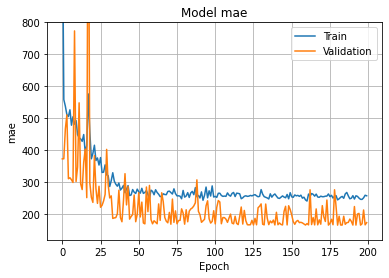

In [ ]:
# 단일 채널 비트코인 가격 예측

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
# RNN 쓰고 싶을 경우 model.add(SimpleRNN(128,....)) 하면 됨

# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split];y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:", ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()